In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [4]:
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [0]:
from keras import Sequential

In [0]:
import pandas as pd
pd.__version__
pd.options.display.max_rows = 15

In [0]:
white_wine = pd.read_csv('/gdrive/My Drive/wine with keras/wine data/winequality-white.csv')

In [0]:
red_wine = pd.read_csv('/gdrive/My Drive/wine with keras/wine data/winequality-red.csv')

In [9]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [10]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [0]:
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
scaler = MinMaxScaler()
def generate_data(df, t_r):
  x = df.iloc[:, :-1].values
  y = df.iloc[:, -1].values
  x[:] = scaler.fit_transform(x[:])
  t_r_n = int(len(x) * t_r)
  print(t_r_n)

  X_train = x[:][:t_r_n]
  Y_train = y[:][:t_r_n]
  X_test = x[:][t_r_n:]
  Y_test = y[:][t_r_n:]
  #X_train = x[-t_r_n:, :]
  #Y_train = y[-t_r_n:]
  #X_test = x[t_r_n:, :]
  #Y_test = y[t_r_n:]

  return X_train, Y_train, X_test, Y_test

In [12]:
wine = pd.concat([white_wine, red_wine])
display(wine)
x_train, y_train, x_test, y_test = generate_data(wine, 0.7)
#print(x_train.shape)
#print(x_test.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


4547


In [13]:
display(x_train)
display(y_train)
display(x_test)
display(y_test)

array([[0.26446281, 0.12666667, 0.21686747, ..., 0.21705426, 0.12921348,
        0.11594203],
       [0.20661157, 0.14666667, 0.20481928, ..., 0.4496124 , 0.15168539,
        0.2173913 ],
       [0.3553719 , 0.13333333, 0.24096386, ..., 0.41860465, 0.12359551,
        0.30434783],
       ...,
       [0.16528926, 0.13333333, 0.18072289, ..., 0.41860465, 0.20224719,
        0.6884058 ],
       [0.20661157, 0.11333333, 0.31927711, ..., 0.36434109, 0.0505618 ,
        0.72463768],
       [0.2231405 , 0.08      , 0.18674699, ..., 0.18604651, 0.21910112,
        0.57971014]])

array([6, 6, 6, ..., 6, 6, 6])

array([[0.17355372, 0.14      , 0.19277108, ..., 0.48837209, 0.07303371,
        0.50724638],
       [0.21487603, 0.25333333, 0.13253012, ..., 0.51937984, 0.21348315,
        0.36231884],
       [0.25619835, 0.13333333, 0.22289157, ..., 0.25581395, 0.17977528,
        0.44927536],
       ...,
       [0.20661157, 0.28666667, 0.07831325, ..., 0.54263566, 0.29775281,
        0.43478261],
       [0.17355372, 0.37666667, 0.07228916, ..., 0.65891473, 0.2752809 ,
        0.31884058],
       [0.18181818, 0.15333333, 0.28313253, ..., 0.51937984, 0.24719101,
        0.43478261]])

array([6, 5, 5, ..., 6, 5, 6])

In [14]:
len(x_train)
display(x_train)
display(y_train)

array([[0.26446281, 0.12666667, 0.21686747, ..., 0.21705426, 0.12921348,
        0.11594203],
       [0.20661157, 0.14666667, 0.20481928, ..., 0.4496124 , 0.15168539,
        0.2173913 ],
       [0.3553719 , 0.13333333, 0.24096386, ..., 0.41860465, 0.12359551,
        0.30434783],
       ...,
       [0.16528926, 0.13333333, 0.18072289, ..., 0.41860465, 0.20224719,
        0.6884058 ],
       [0.20661157, 0.11333333, 0.31927711, ..., 0.36434109, 0.0505618 ,
        0.72463768],
       [0.2231405 , 0.08      , 0.18674699, ..., 0.18604651, 0.21910112,
        0.57971014]])

array([6, 6, 6, ..., 6, 6, 6])

In [15]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=11)
y_test = to_categorical(y_test, num_classes=11)
y_train.shape

(4547, 11)

In [0]:
import keras
from keras import regularizers
from keras.layers import BatchNormalization
model = models.Sequential()
#model.add(layers.Dense(units=32, input_dim=11, activation = 'relu'))
model.add(layers.Dense(units=1024, input_dim= 11, activation = 'relu', 
                ))
model.add(layers.Dense(units=512, activation = 'relu',
                ))
#keras.layers.Dropout(0.3)
model.add(layers.Dense(units=256, activation = 'relu',
                ))
model.add(layers.Dense(units=64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)
                ))
model.add(layers.Dense(units=32, activation = 'relu',  kernel_regularizer=regularizers.l2(0.01)
                ))
model.add(layers.Dense(11, activation='softmax'))
SGD = keras.optimizers.SGD(lr=0.15, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer= 'SGD' , loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
result = model.fit(x_train, y_train, epochs=130,batch_size = 32)

Epoch 1/130
143/143 [==============================] - 1s 4ms/step - loss: 3.3355 - accuracy: 0.4348
Epoch 2/130
143/143 [==============================] - 1s 4ms/step - loss: 2.7671 - accuracy: 0.4405
Epoch 3/130
143/143 [==============================] - 1s 4ms/step - loss: 2.6053 - accuracy: 0.4405
Epoch 4/130
143/143 [==============================] - 1s 4ms/step - loss: 2.5157 - accuracy: 0.4405
Epoch 5/130
143/143 [==============================] - 1s 4ms/step - loss: 2.4405 - accuracy: 0.4407
Epoch 6/130
143/143 [==============================] - 1s 4ms/step - loss: 2.3697 - accuracy: 0.4401
Epoch 7/130
143/143 [==============================] - 1s 4ms/step - loss: 2.3041 - accuracy: 0.4427
Epoch 8/130
143/143 [==============================] - 1s 4ms/step - loss: 2.2421 - accuracy: 0.4407
Epoch 9/130
143/143 [==============================] - 1s 4ms/step - loss: 2.1806 - accuracy: 0.4497
Epoch 10/130
143/143 [==============================] - 1s 4ms/step - loss: 2.1187 - accura

61/61 - 0s - loss: 1.0808 - accuracy: 0.5559
0.5558974146842957


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

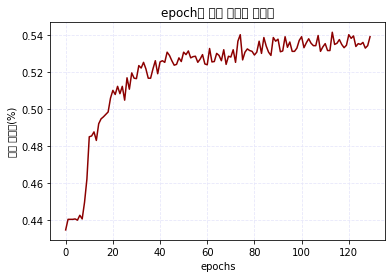

0.5558974146842957


<Figure size 432x288 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
import matplotlib

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)
# 도화지 생성
fig = plt.figure()
# 정확도 그래프 그리기
plt.plot(result.history['accuracy'], label='Accuracy', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('검증 정확도(%)')
plt.title('epoch에 따른 정확도 그래프')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()
plt.savefig('mnist_tensorflow_acc.png')
print(test_acc)